In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# read csv
data = pd.read_csv("./datasets/All.csv")
# convert dates
data["Hour"] = data["Hour"].astype("str")
data["DateTime"] = pd.to_datetime(data["Date"] + " " + data["Hour"] + ":00:00")
del data["Hour"]
del data["Date"]
# set datetime index
data.index = pd.DatetimeIndex(data.DateTime)
data["NO2"] = data["NO2-ug-per-m3"].astype("int")
del data["NO2-ug-per-m3"]
# fix temp col
data = data[data["air_temp_deg_c"] > -500]
data.head()

,Cars-Direction-1,Cars-Direction-2,Cars-Total,Day-Of-Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,...,rain_millimeters,did_it_rain,air_temp_deg_c,relative_humidity_percent,e5,e10,diesel,Number of vessels,DateTime,NO2
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 04:00:00,60,44,104,2,0,1,0,0,0,0,...,0.2,1,7.8,94.0,1.409000,1.389000,1.289000,3,2019-01-01 04:00:00,8
2019-01-01 05:00:00,44,33,77,2,0,1,0,0,0,0,...,0.0,1,8.1,94.0,1.412924,1.387101,1.272671,5,2019-01-01 05:00:00,5
2019-01-01 06:00:00,46,43,89,2,0,1,0,0,0,0,...,0.1,1,8.2,83.0,1.389000,1.365522,1.241174,4,2019-01-01 06:00:00,5
2019-01-01 07:00:00,39,41,80,2,0,1,0,0,0,0,...,0.0,0,7.0,75.0,1.377876,1.353382,1.229562,3,2019-01-01 07:00:00,5
2019-01-01 08:00:00,26,35,61,2,0,1,0,0,0,0,...,0.0,0,7.0,73.0,1.361500,1.336188,1.205406,3,2019-01-01 08:00:00,6


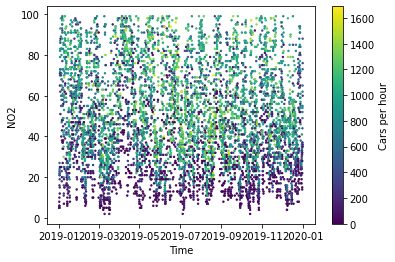

'(Color: cars total) NO2 correlates with cars'

In [17]:
plt.figure()
plt.scatter(data["DateTime"], data["NO2"], s=2, c=data["Cars-Total"])
plt.xlabel("Time")
plt.ylabel("NO2")
cb = plt.colorbar()
cb.set_label("Cars per hour")
plt.show()
display("(Color: cars total) NO2 correlates with cars")

<ipython-input-18-3d6144e11770>:19: RuntimeWarning: invalid value encountered in true_divide
  cars = cars / cars_sample_counter
<ipython-input-18-3d6144e11770>:20: RuntimeWarning: invalid value encountered in true_divide
  no2 = no2 / cars_sample_counter


<Figure size 432x288 with 0 Axes>

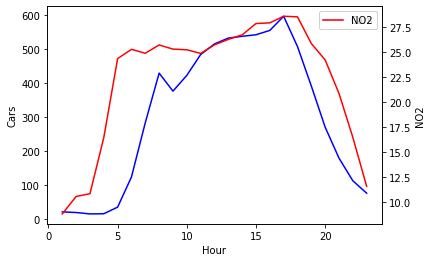

In [18]:
# NO2 in relation to hourly cars
def cars_hourly(data):
    # array for 24 hours for "Cars-Total"
    cars = np.zeros(24)
    cars_sample_counter = np.zeros(24)
    # array for 24 hours for "NO2"
    no2 = np.zeros(24)
    cars_sample_counter = np.zeros(24)
    # iterate over data and put NO2 and Cars-Total in arrays
    for i in range(len(data)):
        # get hour from column "DateTime" like this  "2019-01-02 04:00:00"
        hour = data.iloc[i]["DateTime"].hour
        cars[hour] += data["Cars-Total"][i]
        cars_sample_counter[hour] += 1
        no2[hour] += data["NO2"][i]
        cars_sample_counter[hour] += 1

    # to erase the different sample sizes we divide by the sample size
    cars = cars / cars_sample_counter
    no2 = no2 / cars_sample_counter

    # plot "cars" and "no2" as lines in ax1 and ax2 but in one graph
    # "no2" is red
    plt.figure()
    fig, ax1 = plt.subplots()
    ax1.plot(cars, color="blue", label="Cars")
    ax1.set_xlabel("Hour")
    ax1.set_ylabel("Cars")
    ax1.legend()
    ax2 = ax1.twinx()
    ax2.plot(no2, color="red", label="NO2")
    ax2.set_ylabel("NO2")
    ax2.legend()
    plt.show()

cars_hourly(data)


<Figure size 432x288 with 0 Axes>

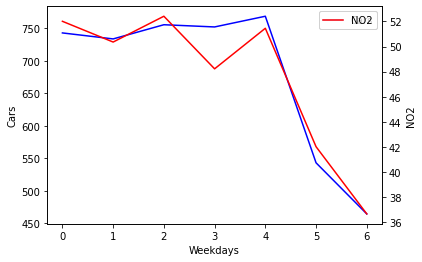

In [19]:
# NO2 in relation to cars on week days
def cars_weekdays(data):
    # array for 7 days of the week
    cars = np.zeros(7)
    cars_sample_counter = np.zeros(7)
    # array for 7 days of the week
    no2 = np.zeros(7)
    no2_sample_counter = np.zeros(7)
    # iterate over data and put NO2 and Cars-Total in arrays
    for i in range(len(data)):
        # get weekday from column "DateTime" like this  "2019-01-02 04:00:00"
        weekday = data.iloc[i]["DateTime"].weekday()
        cars[weekday] += data["Cars-Total"][i]
        cars_sample_counter[weekday] += 1
        no2[weekday] += data["NO2"][i]
        no2_sample_counter[weekday] += 1

    # to erase the different sample sizes we divide by the sample size
    cars = cars / cars_sample_counter
    no2 = no2 / no2_sample_counter

    # plot "cars" and "no2" as lines in ax1 and ax2 but in one graph
    # "no2" is red
    plt.figure()
    fig, ax1 = plt.subplots()
    ax1.plot(cars, color="blue", label="Cars")
    ax1.set_xlabel("Weekdays")
    ax1.set_ylabel("Cars")
    ax1.legend()
    ax2 = ax1.twinx()
    ax2.plot(no2, color="red", label="NO2")
    ax2.set_ylabel("NO2")
    ax2.legend()
    plt.show()
cars_weekdays(data)


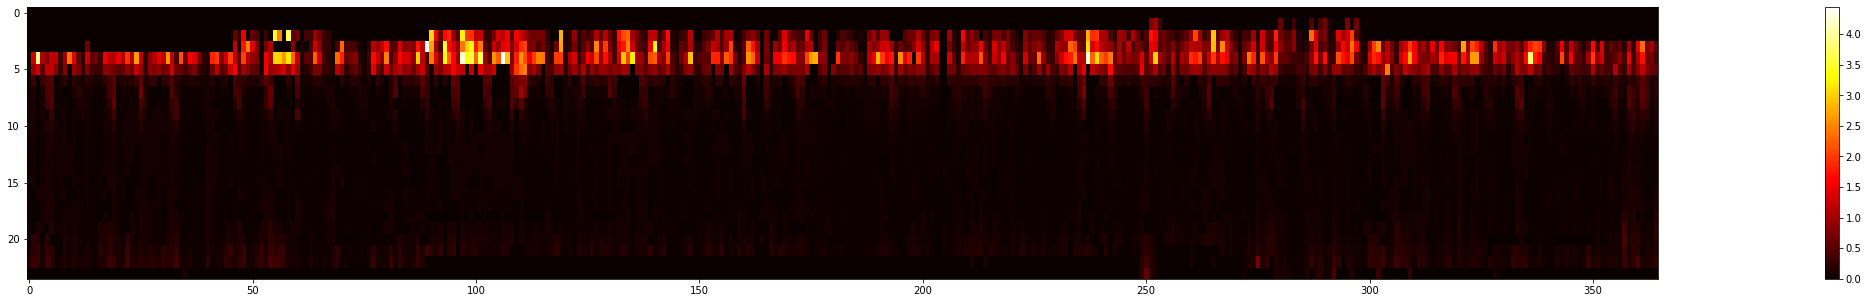

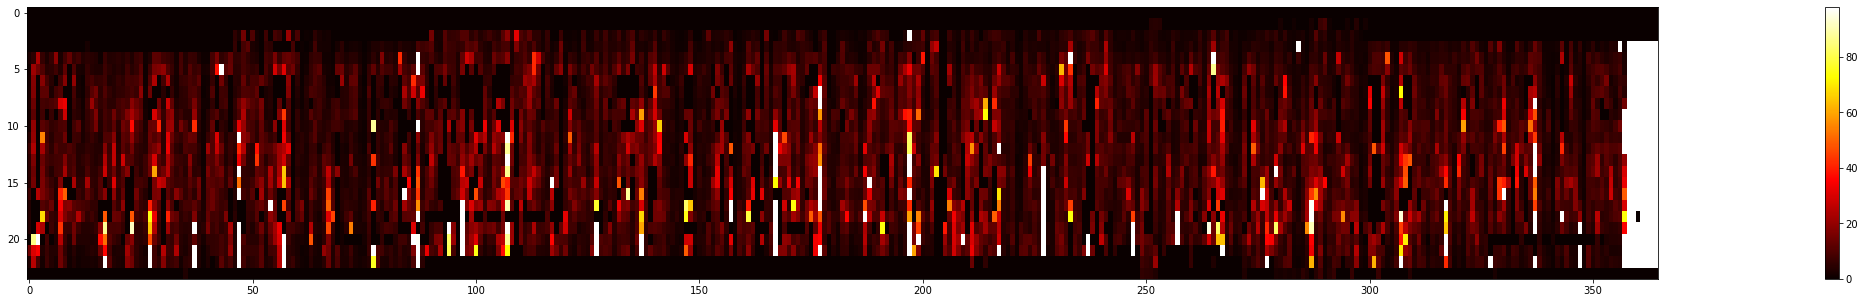

In [69]:
import numpy as np

def yearmap(data, column) :
    # array with 365 days on axis 0 and 24 hours on axis 1
    array = np.zeros((24, 365))
    # iterate over data and put NO2 and Cars-Total in array
    for i in range(len(data)):
        date_time = data.iloc[i]["DateTime"]
        day_of_year = date_time.dayofyear
        hour = date_time.hour

        array[hour][day_of_year-1] += column[i]

    # plot matrix as square heatmap
    plt.figure(figsize=(60, 5))
    plt.imshow(array, cmap="hot", interpolation="nearest",
               aspect=(365/24)/6)
    plt.colorbar()

    plt.show()


yearmap(data, data["NO2"]/data["Cars-Total"])
yearmap(data, data["NO2"]/data["Number of vessels"])


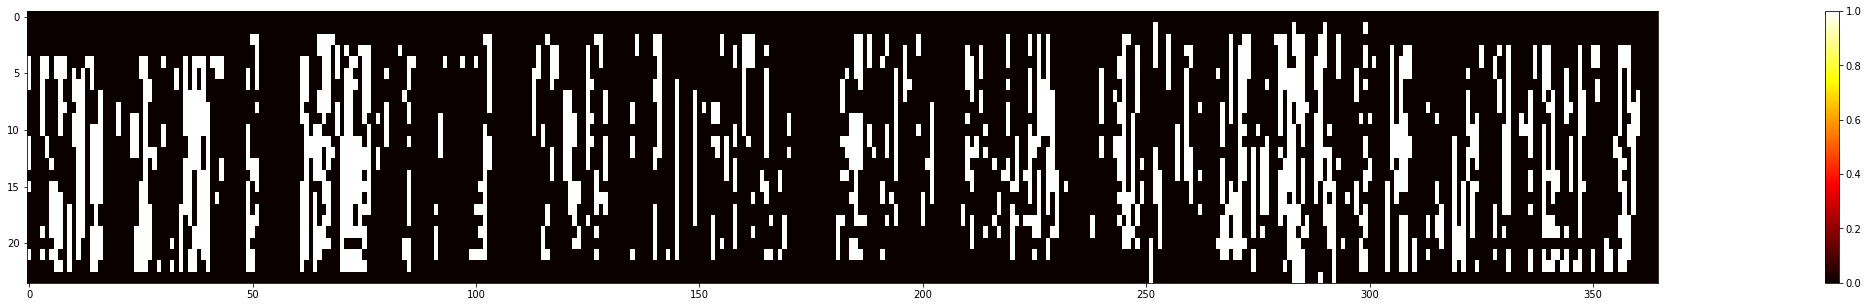

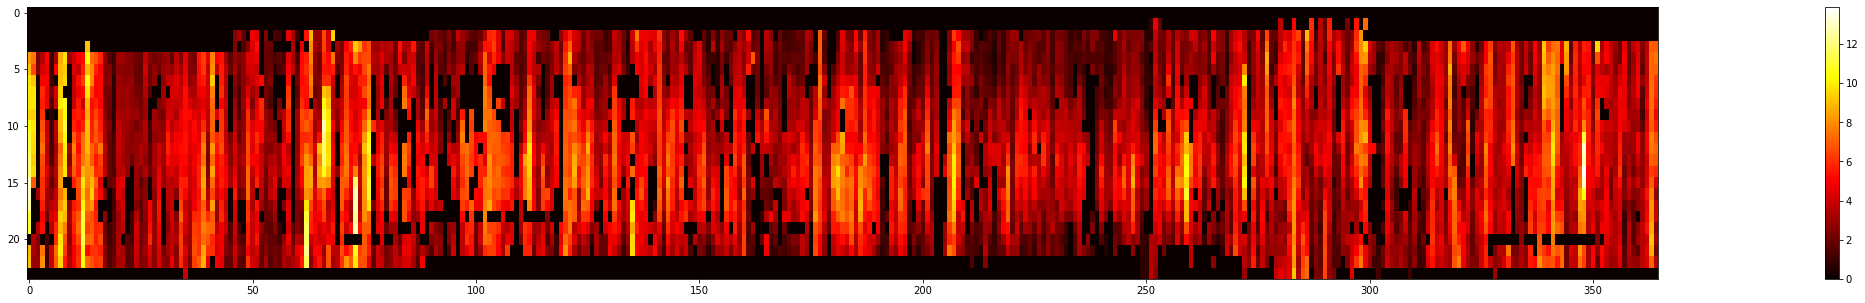

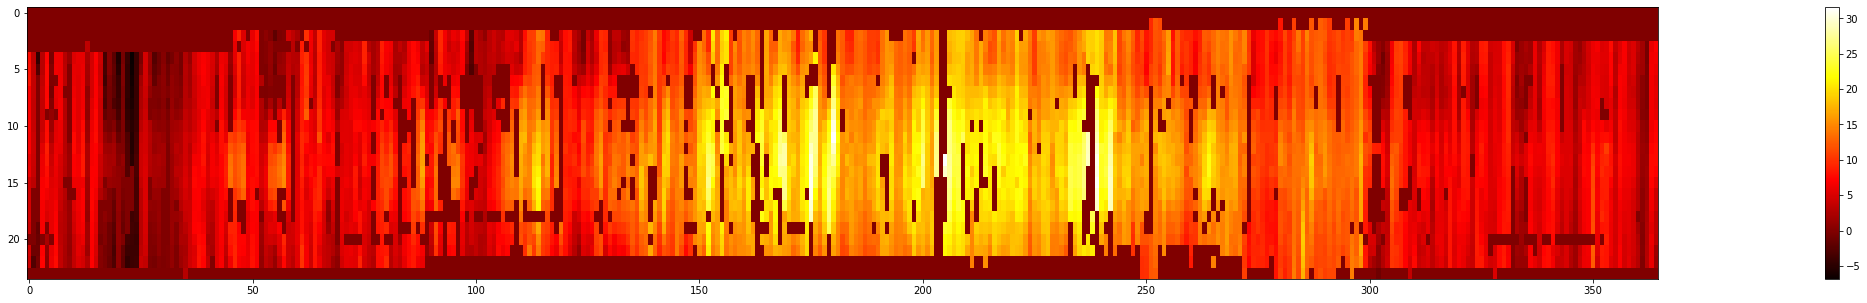

In [73]:
yearmap(data, data["did_it_rain"])
yearmap(data, data["wind_meters_per_second"])
yearmap(data, data["air_temp_deg_c"])


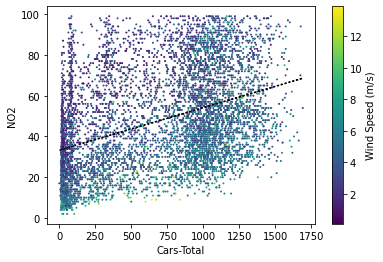

'Color: Wind speed (Strong wind -> Less NO2 measured)'

In [21]:
plt.figure()
plt.scatter(data["Cars-Total"], data["NO2"], s=1, c=data["wind_meters_per_second"])
m,c = np.polyfit(data["Cars-Total"], data["NO2"], 1)
plt.plot(data["Cars-Total"], m*data["Cars-Total"]+c, c="black", linestyle="dotted")
plt.xlabel("Cars-Total")
plt.ylabel("NO2")
cb = plt.colorbar()
cb.set_label("Wind Speed (m/s)")
plt.show()
display("Color: Wind speed (Strong wind -> Less NO2 measured)")

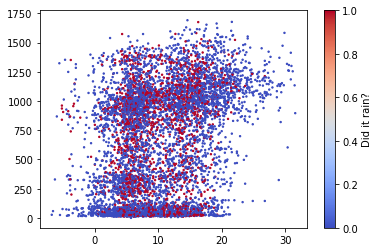

'(Color: red=rain, blue=dry) Car traffic does not seem to be correlated with temperature'

In [22]:
plt.figure()
plt.scatter(data["air_temp_deg_c"], data["Cars-Total"], s=2, c=data["did_it_rain"], cmap="coolwarm")
cb = plt.colorbar()
cb.set_label("Did it rain?")
plt.show()
display("(Color: red=rain, blue=dry) Car traffic does not seem to be correlated with temperature")

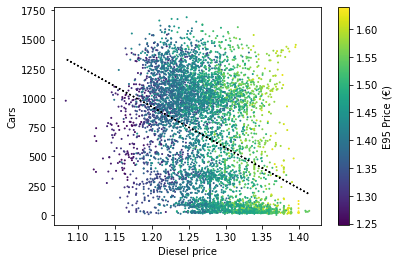

'(Color: gas price) Cheaper diesel fuel means more traffic'

In [23]:
plt.figure()
plt.scatter(data["diesel"], data["Cars-Total"], s=1, c=data["e5"])
m,c = np.polyfit(data["diesel"], data["Cars-Total"], 1)
plt.plot(data["diesel"], m*data["diesel"]+c, c="black", linestyle="dotted")
plt.xlabel("Diesel price")
plt.ylabel("Cars")
cb = plt.colorbar()
cb.set_label("E95 Price (€)")
plt.show()
display("(Color: gas price) Cheaper diesel fuel means more traffic")

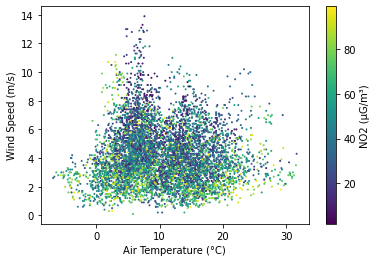

In [24]:
plt.figure()
plt.scatter(data["air_temp_deg_c"], data["wind_meters_per_second"], s=1, c=data["NO2"])
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Wind Speed (m/s)")
cb = plt.colorbar()
cb.set_label("NO2 (µG/m³)")
plt.show()

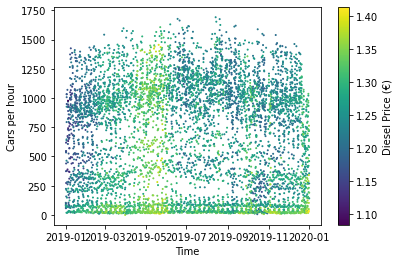

In [25]:
plt.figure()
plt.scatter(data["DateTime"],data["Cars-Total"], c=data["diesel"], s=1)
plt.xlabel("Time")
plt.ylabel("Cars per hour")
cb = plt.colorbar()
cb.set_label("Diesel Price (€)")
plt.show()